In [35]:
import torch
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
torch.manual_seed(1)
size=100
0.2*torch.rand(size)


tensor([0.1515, 0.0559, 0.0806, 0.1469, 0.0059, 0.1600, 0.0794, 0.1509, 0.1139,
        0.0878, 0.1277, 0.1049, 0.1365, 0.0610, 0.0927, 0.0910, 0.1145, 0.0996,
        0.1874, 0.1311, 0.0628, 0.0396, 0.0832, 0.0569, 0.0680, 0.1048, 0.1596,
        0.1544, 0.0022, 0.1620, 0.1279, 0.1949, 0.1660, 0.0089, 0.0049, 0.0518,
        0.1878, 0.0833, 0.1428, 0.0535, 0.1981, 0.0577, 0.1750, 0.1012, 0.0473,
        0.1514, 0.0469, 0.1294, 0.0711, 0.0890, 0.0039, 0.0523, 0.1543, 0.0757,
        0.1996, 0.1802, 0.0953, 0.0333, 0.1609, 0.1310, 0.0354, 0.1650, 0.1607,
        0.1887, 0.0439, 0.0835, 0.0981, 0.1146, 0.0241, 0.0290, 0.1544, 0.0766,
        0.1488, 0.1057, 0.1328, 0.1220, 0.1364, 0.1496, 0.0074, 0.1503, 0.0297,
        0.0245, 0.1061, 0.0830, 0.1587, 0.0421, 0.0111, 0.1728, 0.0852, 0.1562,
        0.1321, 0.0250, 0.1201, 0.1240, 0.0330, 0.0526, 0.1341, 0.1179, 0.0575,
        0.0697])

torch.Size([100, 1]) torch.Size([100, 1])


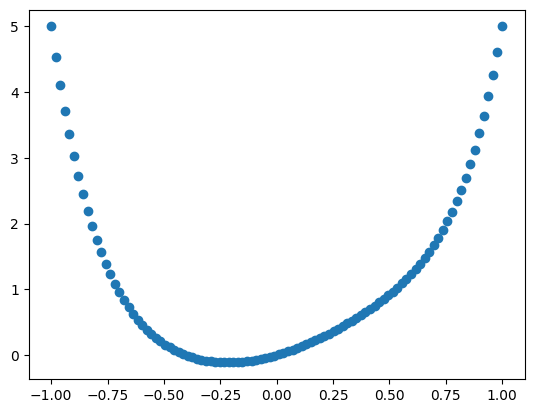

In [67]:
lr=0.3
X = torch.unsqueeze(torch.linspace(-1, 1,100), dim=1)
Y = 3 * X ** 6 - X ** 3 + 2 * X ** 2 + X
print(X.shape,Y.shape)
plt.scatter(X,Y)
plt.show()

In [68]:
# 神经网络结构

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, 8)
        self.fc2 = torch.nn.Linear(8, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr)
loss_function = torch.nn.MSELoss()

In [69]:
for i in range(100):
    prediction = net(X)
    loss = loss_function(prediction, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%10==0:
        print(loss)

tensor(2.5253, grad_fn=<MseLossBackward0>)
tensor(2.6333, grad_fn=<MseLossBackward0>)
tensor(1.8238, grad_fn=<MseLossBackward0>)
tensor(1.8101, grad_fn=<MseLossBackward0>)
tensor(1.8021, grad_fn=<MseLossBackward0>)
tensor(1.7964, grad_fn=<MseLossBackward0>)
tensor(1.7917, grad_fn=<MseLossBackward0>)
tensor(1.7870, grad_fn=<MseLossBackward0>)
tensor(1.7817, grad_fn=<MseLossBackward0>)
tensor(1.7751, grad_fn=<MseLossBackward0>)


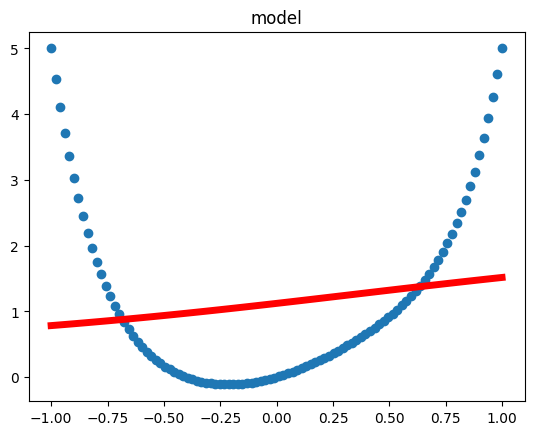

In [70]:
plt.title('model')
plt.scatter(X.data.numpy(), Y.data.numpy())

plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.show()